In [25]:
import datetime as dt
import time
import sys

from module_marche import DonneeMarche
from module_option import Option
from module_arbre import Arbre
from module_grecques_empiriques import GrecquesEmpiriques

sys.setrecursionlimit(1000000000)

start = time.time()
    
#today = dt.date.today()
#today_1y = dt.date(today.year+1, today.month, today.day)
today = dt.date(2024,3,1)
today_1y = dt.date(2024,12,26)

spot = 100
vol = 0.21
discount_rate = risk_free = 0.03
#dividende_ex_date = dt.date(today.year+1, today.month-6, today.day) 
dividende_ex_date = dt.date(2024,6,15) 
dividende_montant = 3

strike = 101
expiry = today_1y 

nb_pas = 300

donnée = DonneeMarche(today, spot, vol, discount_rate, risk_free, dividende_ex_date=dividende_ex_date, dividende_montant=dividende_montant)
option = Option(maturite = expiry, prix_exercice = strike, call = True, date_pricing = today, americaine=False)

arbre = Arbre(nb_pas, donnée, option, pruning = True)
    
arbre.pricer_arbre()

done = time.time()

diff_temps = done - start

print(f"Prix option {arbre.prix_option}")
print(f'Temps pricing (secondes): {round(diff_temps, 1)}')

Prix option 6.761811445624155
Temps pricing (secondes): 0.5


In [2]:
import datetime as dt
import time
import sys

from module_marche import DonneeMarche
from module_option import Option
from module_arbre import Arbre
from module_grecques_empiriques import GrecquesEmpiriques

sys.setrecursionlimit(1000000000)

start = time.time()
    
#today = dt.date.today()
#today_1y = dt.date(today.year+1, today.month, today.day)
today = dt.date(2024,3,1)
today_1y = dt.date(2024,12,26)

spot = 100
vol = 0.30
discount_rate = risk_free = 0.15
#dividende_ex_date = dt.date(today.year+1, today.month-6, today.day) 
dividende_ex_date = dt.date(2024,6,15) 
dividende_montant = 3

strike = 101
expiry = today_1y 

nb_pas = 300

donnée = DonneeMarche(today, spot, vol, discount_rate, risk_free, dividende_ex_date=dividende_ex_date, dividende_montant=dividende_montant)
option = Option(maturite = expiry, prix_exercice = strike, call = True, date_pricing = today, americaine=True)


In [21]:
list_valeur = []
list_x = range(440,460,1)

for p in list_x : 
    arbre = Arbre(p, donnée, option, pruning = True)
        
    arbre.pricer_arbre()

    list_valeur.append(arbre.prix_option)

    print(f"Nombre de pas {p}")
    print(f"Prix option {arbre.prix_option}")

Nombre de pas 440
Prix option 14.583595577046363
Nombre de pas 441
Prix option 14.58310934979726
Nombre de pas 442
Prix option 14.583793276541314
Nombre de pas 443
Prix option 14.583307005559824
Nombre de pas 444
Prix option 14.582821163162981
Nombre de pas 445
Prix option 14.583499353932863
Nombre de pas 446
Prix option 14.583013189981326
Nombre de pas 447
Prix option 14.58252814057919
Nombre de pas 448
Prix option 14.583197644674359
Nombre de pas 449
Prix option 14.582712301534553
Nombre de pas 450
Prix option 16.46216041912986
Nombre de pas 451
Prix option 14.582890524131003
Nombre de pas 452
Prix option 14.582406482722245
Nombre de pas 453
Prix option 14.583063812587149
Nombre de pas 454
Prix option 14.582579084873533
Nombre de pas 455
Prix option 14.582095469952224
Nombre de pas 456
Prix option 14.582745528961757
Nombre de pas 457
Prix option 14.582261753644909
Nombre de pas 458
Prix option 14.581780106464178
Nombre de pas 459
Prix option 14.582423556956549


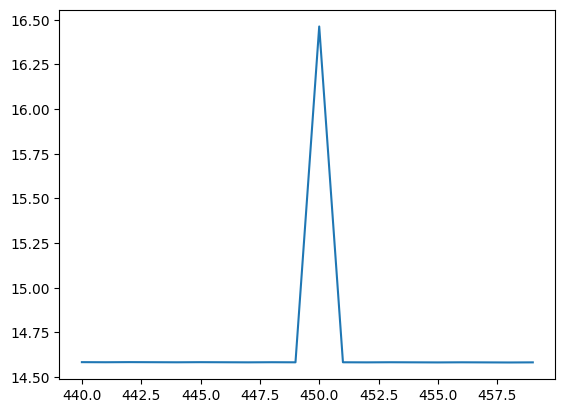

In [22]:
import matplotlib.pyplot as plt

plt.plot(list_x, list_valeur)


In [2]:
grecques = GrecquesEmpiriques(arbre=arbre)

def grecques_all (grecques : GrecquesEmpiriques) -> str : 
    print(f"Delta : {grecques.approxime_delta()}")
    print(f"Gamma : {grecques.approxime_gamma()}")
    print(f"Vega : {grecques.approxime_vega()}")
    print(f"Theta : {grecques.approxime_theta()}")
    print(f"Rho : {grecques.approxime_rho()}")
    
grecques_all(grecques)

Delta : 0.715555583197979
Gamma : -1.2789769243681803e-13
Vega : 0.3073222245562075
Theta : -0.03933541622748393
Rho : 0.44902222084128773


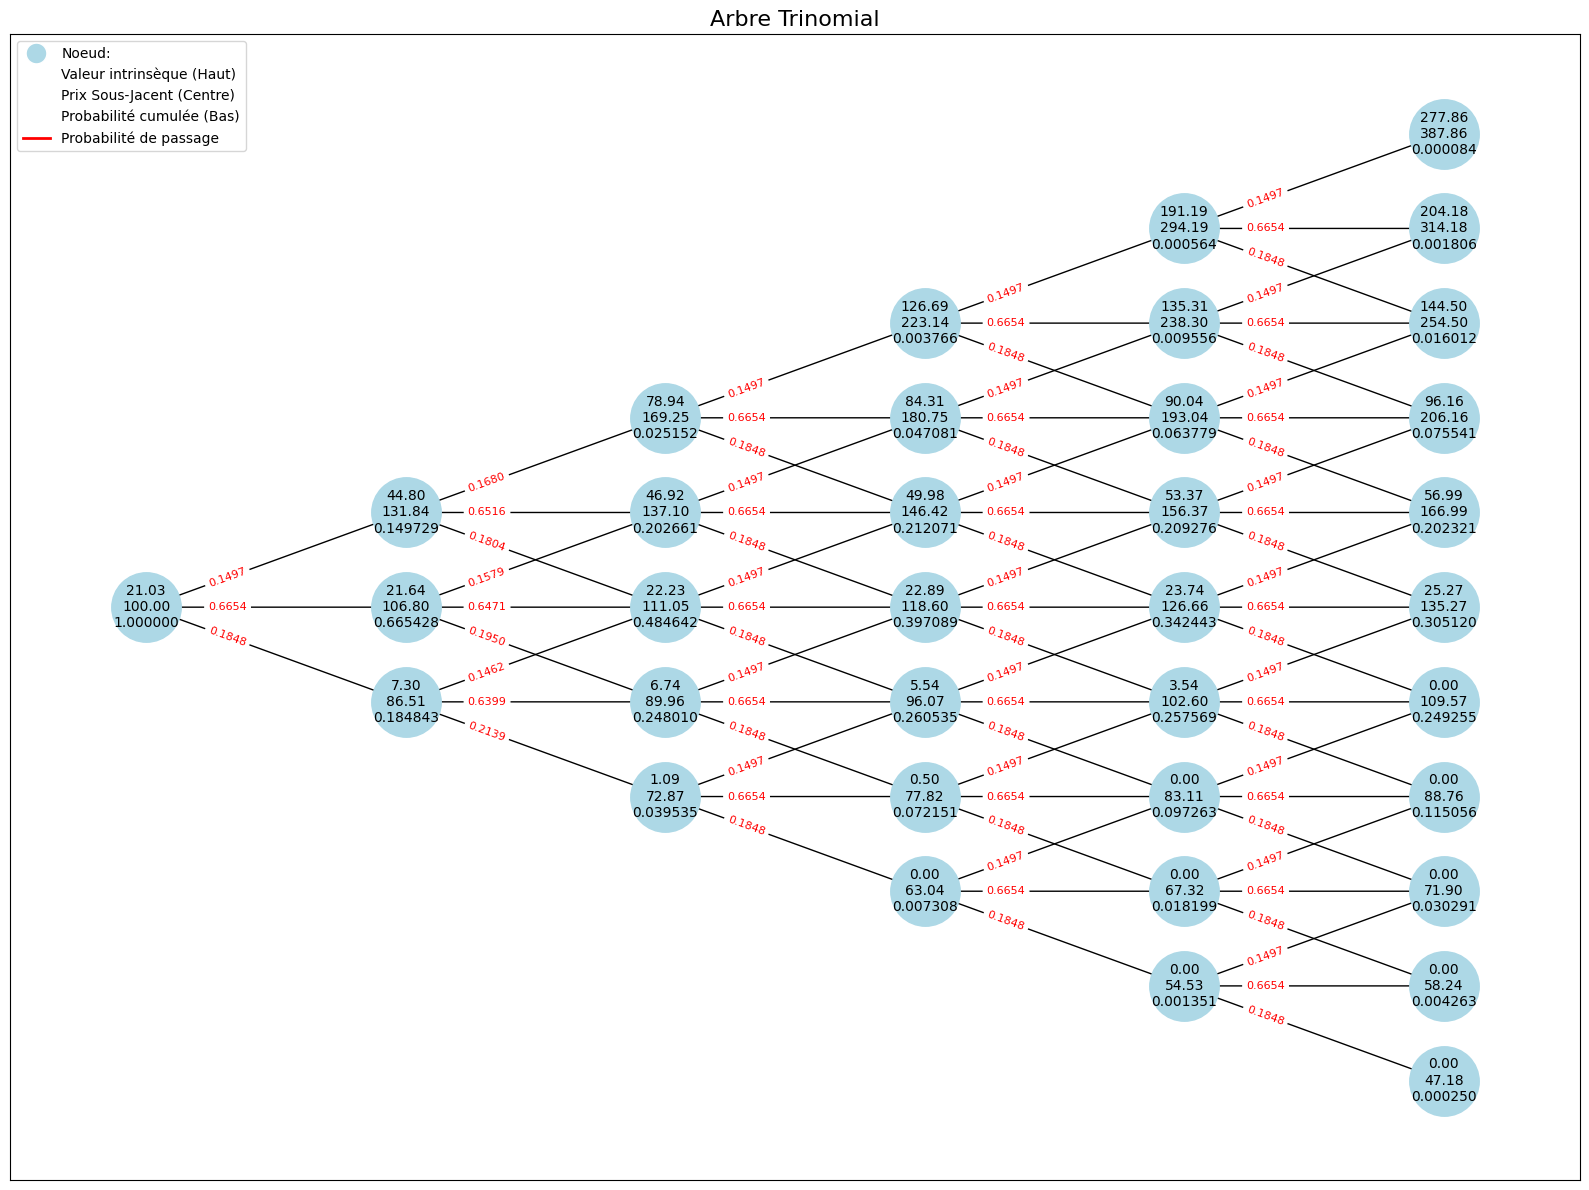

In [5]:
from module_graphique import Arbre_Graph

graph = Arbre_Graph(arbre=arbre)
graph.afficher_arbre()